## ARBOLES DE DECISION

### SANDRA MILENA PATIÑO

In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape


(150, 5)

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

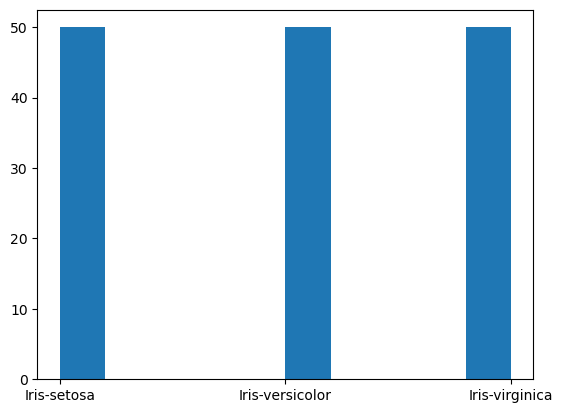

In [13]:
plt.hist(data.species)

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

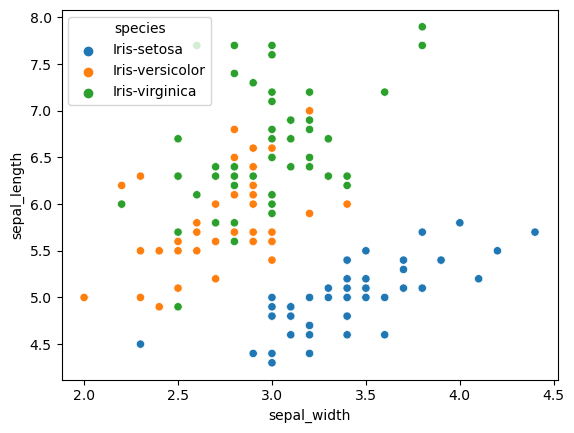

In [15]:
sns.scatterplot(x = "sepal_width", y = "sepal_length", hue = "species", data = data)

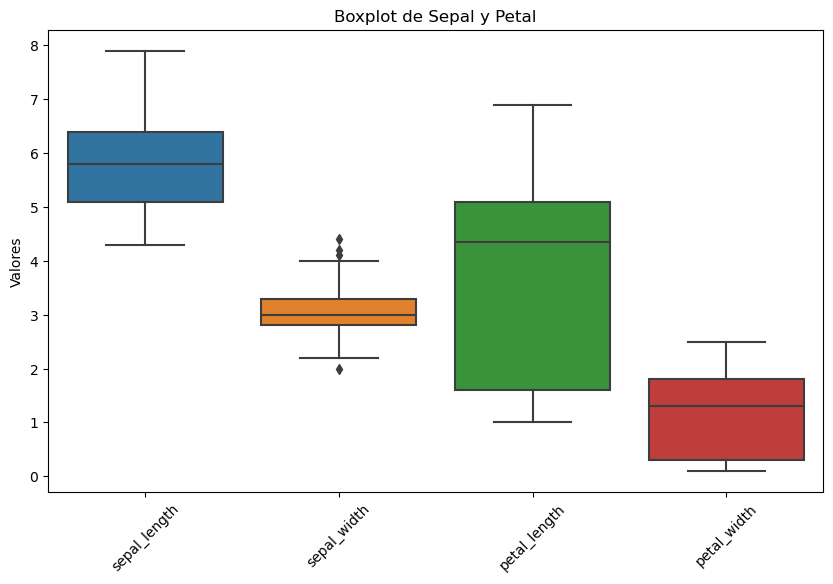

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.xticks(rotation=45)
plt.title('Boxplot de Sepal y Petal')
plt.ylabel('Valores')
plt.show()

In [19]:
predictors_col = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
target_col = ['species']

In [21]:
predictors = data[predictors_col]
target = data[target_col]

In [23]:
predictors

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
target

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [27]:
corr = predictors.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


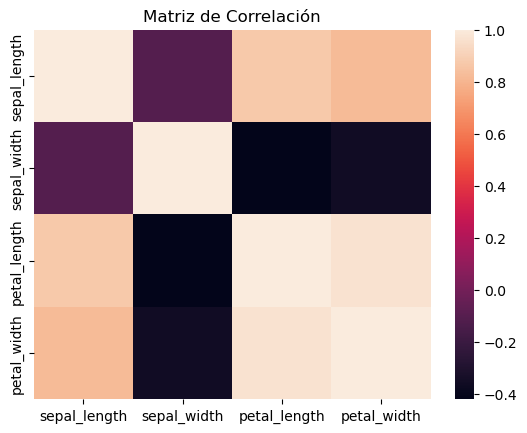

In [29]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [33]:
tree = DecisionTreeClassifier()

In [35]:
arbol = tree.fit(X_train, y_train)

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1,

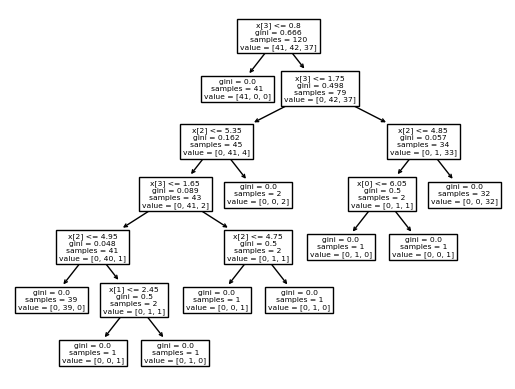

In [37]:
plot_tree(arbol)

In [39]:
predicciones = arbol.predict(X_test)

In [41]:
predicciones

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [43]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,9,0,0
Iris-versicolor,0,8,0
Iris-virginica,0,2,11


In [45]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.9333333333333333

In [47]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.9466666666666667

In [49]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.9333333333333333

In [51]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.9342592592592592